## Menentukan Pertanyaan Bisnis

# Proyek Analisis Data: Bike-sharing
- **Nama:** Wafiul Achdi
- **Email:** achdiwafiul@gmail.com
- **ID Dicoding:** wwafii

- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Bagaimana pengaruh hari dalam seminggu terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

Import Semua Library yang dibutuhkan

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



## Data Wrangling

### Gathering Data

Pada langkah ini, sayaa memuat dataset penyewaan sepeda (`day.csv`) dan menampilkan beberapa baris pertama untuk memahami struktur datanya.

In [20]:
data = pd.read_csv('./data/day.csv')  

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset ini berisi catatan harian penyewaan sepeda, informasi cuaca,
- dan data terkait lainnya.

### Assessing Data

Pada langkah ini, saya menggunakan `data.info()` dan `data.describe()` untuk menilai struktur dataset.

### Assessing Data

In [21]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tipe data dari setiap kolom
- Adanya nilai yang hilang
- Statistik dasar untuk setiap kolom numerik

Informasi ini membantu memahami dataset dan mengidentifikasi masalah yang perlu dibersihkan.

### Cleaning Data

### Cleaning Data

Pada langkah ini, saya menangani masalah yang ditemukan dalam dataset.


In [22]:

print("Duplikasi:", data.duplicated().sum())


print("Nilai yang hilang:\n", data.isnull().sum())


data.rename(columns={
    'yr': 'tahun',
    'mnth': 'bulan',
    'dteday': 'tanggal',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembapan',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)


data.head()
data.to_csv('main_data.csv', index=False)


Duplikasi: 0
Nilai yang hilang:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
1. **Duplikasi**: Saya memeriksa apakah ada baris yang duplikat dan memastikan bahwa tidak ada.
2. **Nilai Hilang**: Saya memastikan bahwa tidak ada nilai yang hilang di setiap kolom.
3. **Mengganti Nama Kolom**: Agar lebih mudah dibaca, saya mengganti nama beberapa kolom dengan nama yang lebih deskriptif (misalnya, `yr` menjadi `tahun`, `mnth` menjadi `bulan`, dll.).

Dengan perubahan ini, dataset siap untuk dianalisis.

## Exploratory Data Analysis (EDA)

Pada tahap ini, saya mengeksplorasi data untuk mendapatkan insight yang lebih dalam. EDA ini akan dibagi menjadi beberapa bagian:
1. EDA Awal
2. Pertanyaan 2: Pengaruh Cuaca
3. Pertanyaan 5: Pengaruh Hari dalam Seminggu
4. Tren Penyewaan
5. Analisis RFM dan Clustering


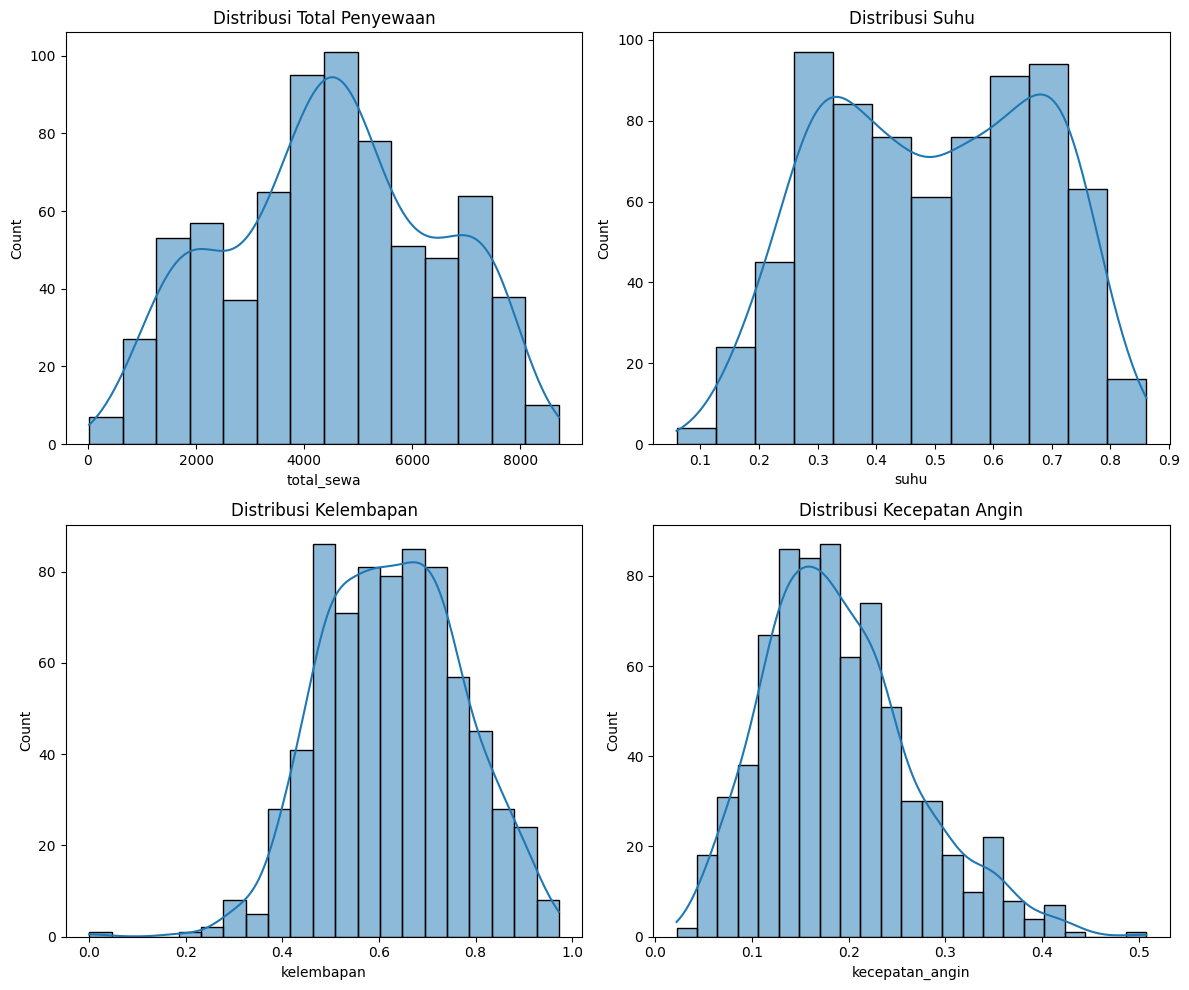

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['total_sewa'], kde=True, ax=axes[0, 0]).set_title("Distribusi Total Penyewaan")
sns.histplot(data['suhu'], kde=True, ax=axes[0, 1]).set_title("Distribusi Suhu")
sns.histplot(data['kelembapan'], kde=True, ax=axes[1, 0]).set_title("Distribusi Kelembapan")
sns.histplot(data['kecepatan_angin'], kde=True, ax=axes[1, 1]).set_title("Distribusi Kecepatan Angin")
plt.tight_layout()
plt.show()

**Insight:**
## EDA Awal

Melihat distribusi data pada kolom yang terkait dengan penyewaan, suhu, kelembapan, dan kecepatan angin.

Berikut adalah insight dari setiap distribusi pada grafik:

1. **Total Penyewaan**: Penyewaan terbanyak berkisar 4000–6000 kali/hari. Fokus penambahan sepeda bisa diarahkan pada area ini.
   
2. **Suhu**: Penyewaan terjadi paling banyak saat suhu sedang (0.2–0.6), menunjukkan preferensi pengguna pada kondisi nyaman.

3. **Kelembapan**: Kelembapan di sekitar 0.5–0.6 mendukung kenyamanan bersepeda.

4. **Kecepatan Angin**: Kecepatan angin rendah (0.1–0.2) mendukung penggunaan sepeda.

**Kesimpulan**: Kondisi nyaman (suhu sedang, kelembapan moderat, dan angin rendah) meningkatkan penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap Penyewaan sepeda?

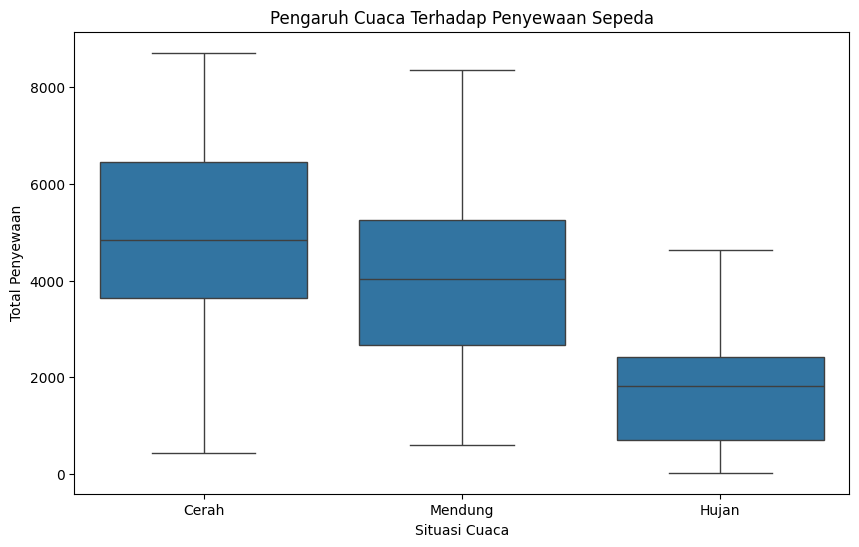

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuaca', y='total_sewa', data=data, order=[1, 2, 3]) 
plt.title("Pengaruh Cuaca Terhadap Penyewaan Sepeda")
plt.xlabel("Situasi Cuaca")
plt.ylabel("Total Penyewaan")


plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Mendung', 'Hujan'])  
plt.show()

**Insight:**
Penyewaan tertinggi terjadi saat cuaca cerah, dan menurun saat mendung atau hujan. Ini menunjukkan cuaca cerah lebih mendukung minat bersepeda.

### Pertanyaan 2: Bagaimana pengaruh hari dalam seminggu terhadap penyewaan sepeda?

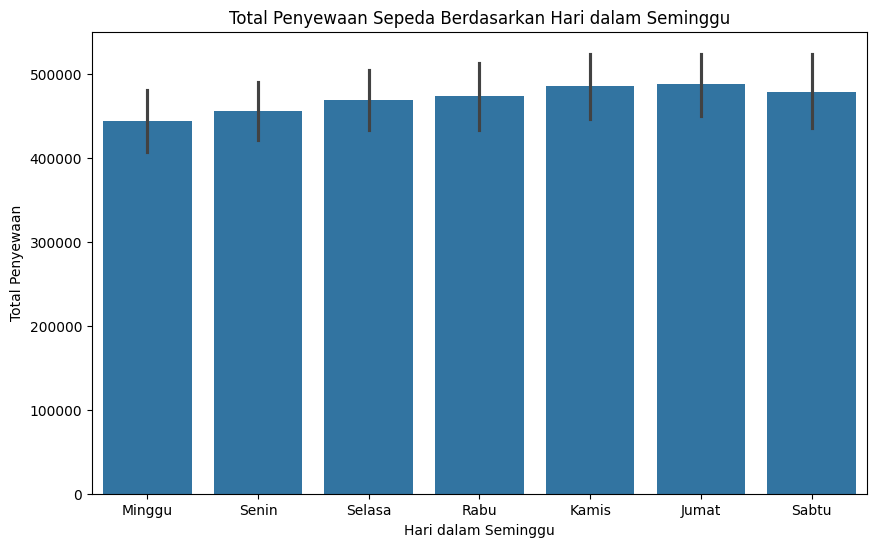

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_sewa', data=data, estimator=sum)
plt.title("Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Total Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()


**Insight:**
- Penyewaan sepeda menunjukkan bahwa tingkat penyewaan cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.

## Analisis Lanjutan Tren Penyewaan Sepanjang Waktu

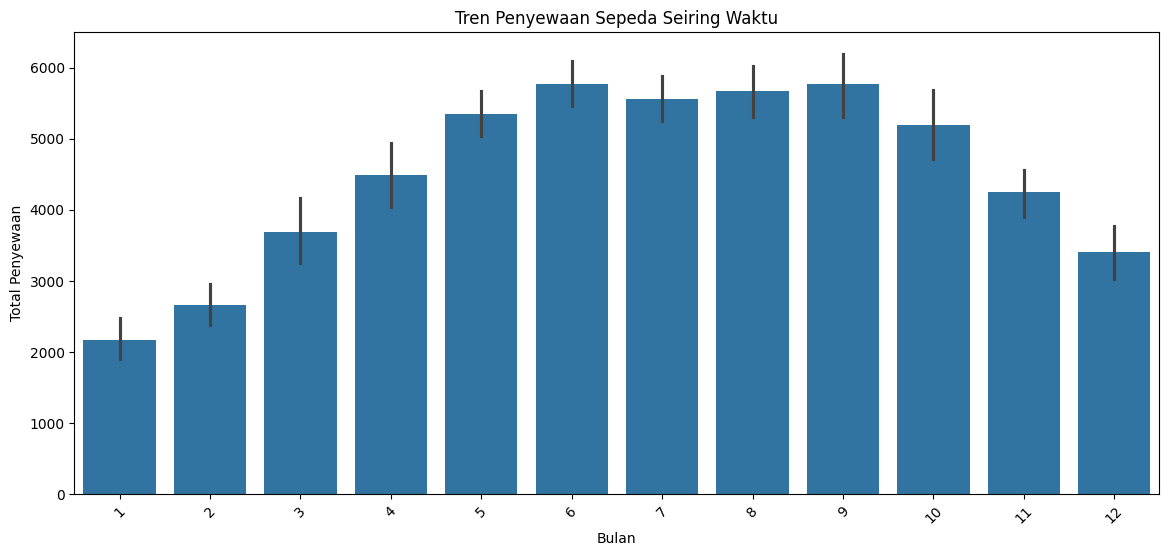

In [26]:
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='bulan', y='total_sewa')
plt.title("Tren Penyewaan Sepeda Seiring Waktu")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Tren penyewaan menunjukkan pola musiman, dengan peningkatan selama musim panas dan gugur, saat cuaca lebih hangat. Pada musim dingin atau hujan, penyewaan turun signifikan. Insight ini dapat dimanfaatkan untuk strategi penempatan sepeda dan promosi di bulan-bulan sepi guna menjaga stabilitas pengguna sepanjang tahun.

## Analisis RFM dan Clustering

Pada bagian ini, saya melakukan analisis **RFM (Recency, Frequency, Monetary)** dan clustering untuk memahami segmentasi pengguna. Dalam konteks ini:
- **Recency**: Mengacu pada seberapa baru transaksi dilakukan (hari terakhir dalam dataset).
- **Frequency**: Mengacu pada seberapa sering sepeda disewa.
- **Monetary**: Total jumlah penyewaan.

Setelah menghitung metrik RFM, kita akan menggunakan metode **Manual Grouping clustering** untuk mengelompokkan data.


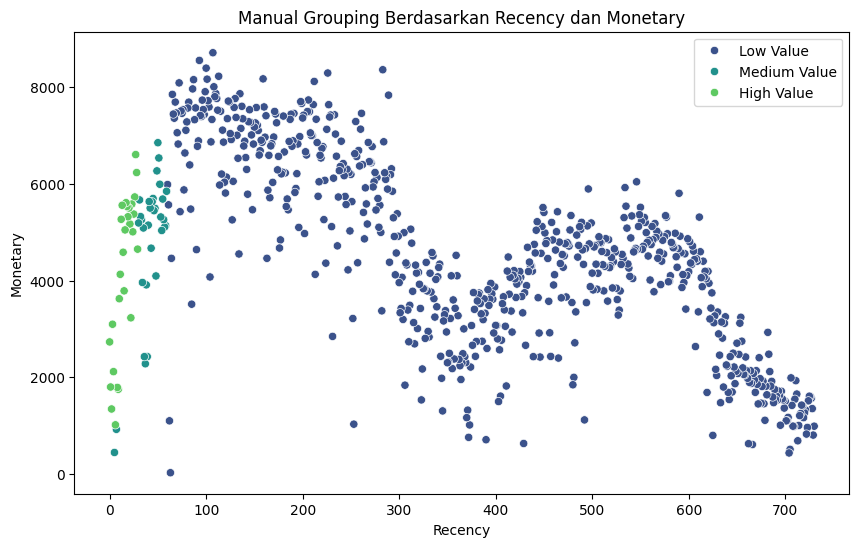

In [27]:
data['Recency'] = (pd.to_datetime(data['tanggal']).max() - pd.to_datetime(data['tanggal'])).dt.days


data['Frequency'] = data['casual'] + data['registered']  
data['Monetary'] = data['total_sewa']  


rfm_data = data[['Recency', 'Frequency', 'Monetary']]


scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)


def assign_group(row):
    if row['Recency'] < 30 and row['Frequency'] > 5 and row['Monetary'] > 1000:
        return 'High Value'
    elif row['Recency'] < 60 and row['Frequency'] > 3:
        return 'Medium Value'
    else:
        return 'Low Value'


data['Cluster'] = data.apply(assign_group, axis=1)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=data, palette='viridis')
plt.title("Manual Grouping Berdasarkan Recency dan Monetary")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend()
plt.show()

### Kesimpulan Analisis RFM dan Clustering

Setelah melakukan clustering pada data RFM, mendapatkan beberapa segmen pengguna berdasarkan perilaku mereka:
- **Low Value**: Mereka yang jarang menyewa sepeda dan menghabiskan sedikit uang. Kita perlu mencari cara untuk menarik perhatian mereka agar mau menyewa lebih sering.
- **Medium Value**: Mereka yang kadang-kadang menyewa sepeda dan menghabiskan jumlah uang yang sedang. Mereka memiliki potensi untuk menjadi pelanggan yang lebih baik jika kita memberikan perhatian lebih.
- **High Value**: Mereka yang sering menyewa sepeda dan menghabiskan banyak uang. Ini adalah pelanggan yang sangat berharga dan perlu kita jaga agar tetap loyal.

Analisis ini membantu memahami perilaku pengguna dan mengelompokkan mereka berdasarkan pola penyewaan sepeda.


## Conclusion

- **Conclution pertanyaan 1**:
Dari analisis kondisi cuaca, terlihat bahwa penyewaan cenderung meningkat pada hari-hari dengan situasi cuaca cerah. Hal ini menunjukkan bahwa cuaca cerah menarik lebih banyak pengguna, kemungkinan karena pengalaman bersepeda menjadi lebih nyaman dan menyenangkan. Pada situasi cuaca mendung, penyewaan sedikit menurun, sementara pada situasi cuaca hujan, jumlah penyewaan turun secara signifikan. Pola ini menunjukkan bahwa cuaca sangat memengaruhi minat pengguna, di mana cuaca buruk menurunkan minat bersepeda secara keseluruhan.

- **Conclution pertanyaan 2**:
Dari hasil analisis, dapat disimpulkan bahwa penyewaan sepeda lebih ramai pada hari kerja, mencerminkan pergeseran perilaku pengguna yang semakin mengandalkan sepeda sebagai moda transportasi untuk aktivitas sehari-hari, terutama untuk perjalanan ke tempat kerja. Hal ini menunjukkan potensi untuk meningkatkan layanan penyewaan sepeda, seperti penempatan sepeda di lokasi strategis dekat perkantoran dan promosi khusus untuk pengguna yang menyewa sepeda pada hari kerja. Dengan demikian, penyewaan sepeda tidak hanya berfungsi sebagai sarana rekreasi, tetapi juga sebagai solusi transportasi yang praktis dan efisien bagi masyarakat urban. 